**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE:
1. Andrea Xcaret Gomez Alfaro
2. Jose de Jesus N. Zuniga Gonzalez
3. Emiliano Palafox Ruiz
4. Miguel Ángel Bustamante Pérez
* MATRÍCULA:
1. A01796384
2. A00669728
3. A01796609
4. A01781583


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos"
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
percentage = (cereals_df.isnull().sum() / len(cereals_df)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})

print("\nPorcentaje de valores faltantes por columna:\n")
missing_data_df.head(18)


Porcentaje de valores faltantes por columna:



,% de valores faltantes
name,0.000000
mfr,0.000000
type,0.000000
calories,0.000000
protein,0.000000
fat,0.000000
sodium,0.000000
fiber,0.000000
carbo,1.298701
sugars,1.298701


In [7]:
numeric_columns = cereals_df.select_dtypes(include=np.number)
numeric_columns.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
cat_columns = cereals_df.select_dtypes(include='object')
cat_columns.describe()

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

La frecuencia por categoría para la variable **mfr** es:

In [9]:
cereals_df['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


La frecuencia por categoría para la variable **shelf** es:


In [10]:
cereals_df['shelf'].value_counts()

,count
shelf,
3,36
2,21
1,20


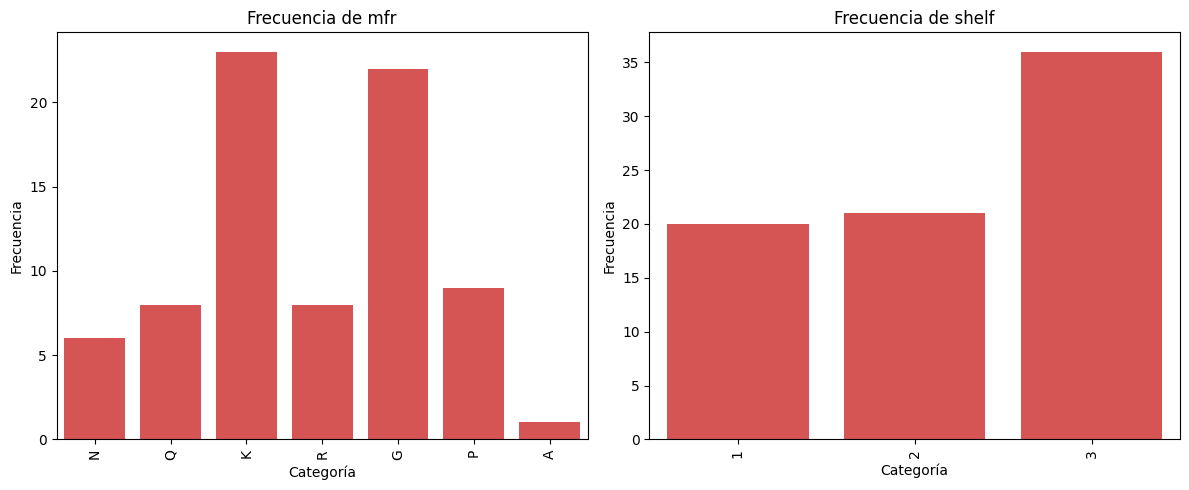

In [11]:
plot_columns = ['mfr', 'shelf']

plt.figure(figsize=(12, 5))

for i, column in enumerate(plot_columns):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=cereals_df[column], color="#E60E0E", alpha=0.8)
    plt.title(f"Frecuencia de {column}")
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [12]:
cereals_df.pivot_table(index='mfr', columns='shelf', aggfunc='size', fill_value=0)

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


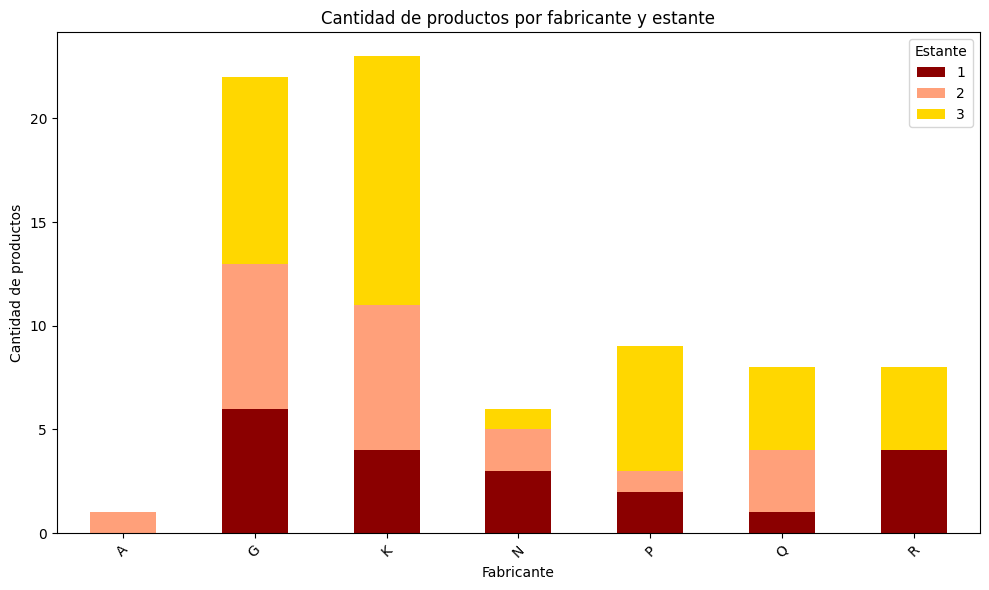

In [13]:
pivot_mfr = cereals_df.pivot_table(index='mfr', columns='shelf', aggfunc='size', fill_value=0)
pivot_mfr.plot(kind='bar', stacked=True, color=["#8B0000", "#FFA07A", "#FFD700"], figsize=(10, 6))

plt.title("Cantidad de productos por fabricante y estante")
plt.xlabel("Fabricante")
plt.ylabel("Cantidad de productos")
plt.legend(title="Estante")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [14]:
rating_bins = pd.cut(cereals_df['rating'], bins=10)
rating_bins.value_counts()

,count
rating,
"(33.175, 40.741]",22
"(25.609, 33.175]",14
"(48.308, 55.874]",12
"(40.741, 48.308]",11
"(17.967, 25.609]",6
"(55.874, 63.44]",6
"(63.44, 71.006]",3
"(71.006, 78.572]",2
"(86.139, 93.705]",1


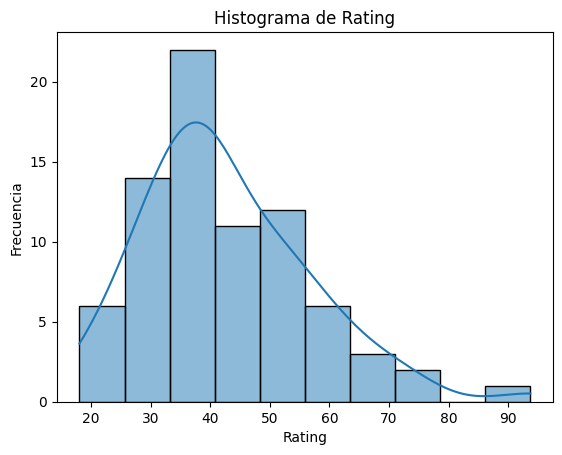

In [15]:
sns.histplot(data=cereals_df['rating'],kde=True, bins=10)
plt.title('Histograma de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

El rango con mayor frecuencia de la variable **rating** es(33.175, 40.741] con una frecuencia de 22.

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [16]:
top_cereals = cereals_df[['name', 'mfr', 'rating']].nlargest(10, 'rating')
top_cereals

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


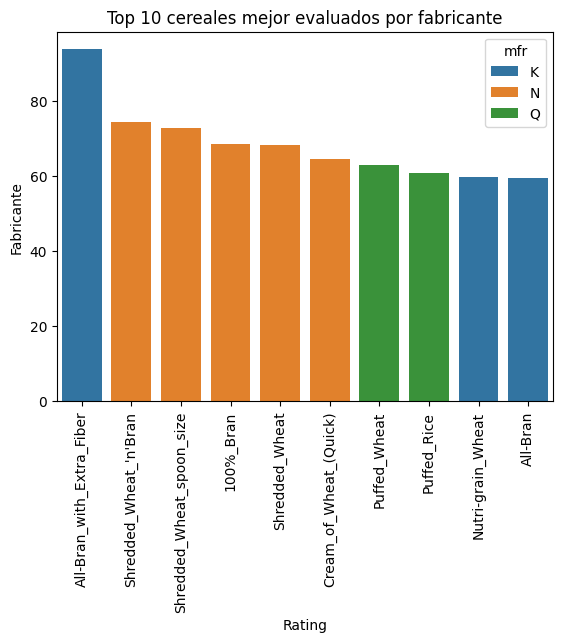

In [17]:
sns.barplot(data=top_cereals, x='name', y='rating', hue='mfr')
plt.title('Top 10 cereales mejor evaluados por fabricante')
plt.xlabel('Rating')
plt.ylabel('Fabricante')
plt.xticks(rotation=90)
plt.show()

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

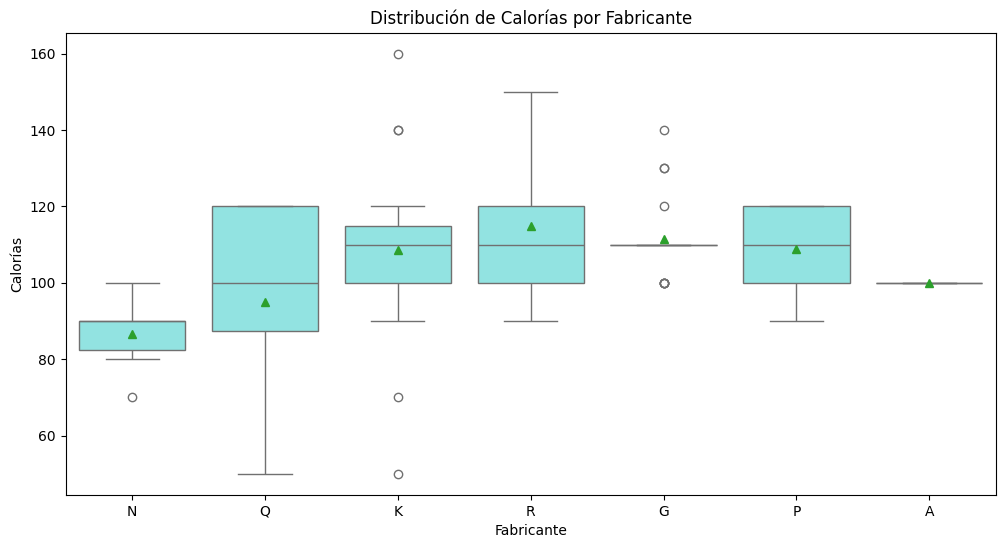

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cereals_df, x='mfr', y='calories', showmeans=True, color="#84F1EE")
plt.title("Distribución de Calorías por Fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Calorías")
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

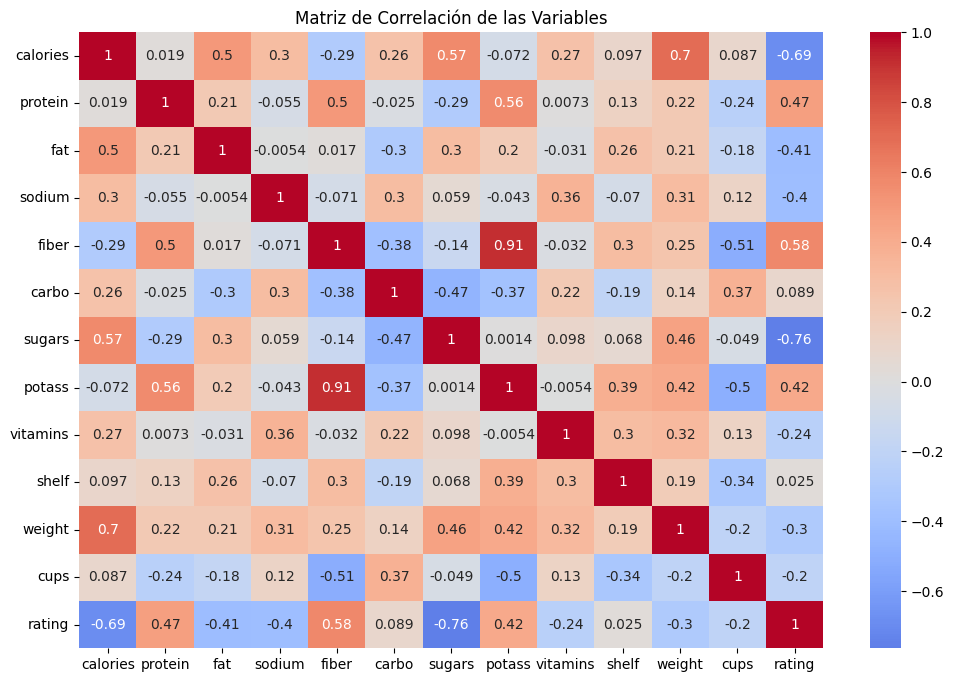

In [19]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de las Variables")
plt.show()

In [20]:
correlation_matrix["rating"].sort_values(ascending=False)

,rating
rating,1.000000
fiber,0.584160
protein,0.470618
potass,0.416009
carbo,0.088712
shelf,0.025159
cups,-0.203160
vitamins,-0.240544
weight,-0.298124
sodium,-0.401295


Las variables con mayor correlación son **calories** con *-0.689376* y **sugars** con *-0.763902*.

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [21]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

In [22]:
percentage = (cereals_df.isnull().sum() / len(cereals_df)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})

print("\nPorcentaje de valores faltantes por columna:\n")
missing_data_df.head(18)


Porcentaje de valores faltantes por columna:



,% de valores faltantes
name,0.0
mfr,0.0
type,0.0
calories,0.0
protein,0.0
fat,0.0
sodium,0.0
fiber,0.0
carbo,0.0
sugars,0.0


In [23]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.4+ KB


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [24]:
y = cereals_df['rating']
X = cereals_df.select_dtypes(include=['float64', 'int64']).drop(columns='rating')

**Nota**: Al utilizar pandas, a pesar de ser variables categóricas al tener valores numéricos las toma como variables numéricas.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(X_scaled)
x_projected = pd.DataFrame(x_projected)

In [27]:
# Valores propios
print("Valores propios:", list(np.round(pca.explained_variance_, decimals=8)))

Valores propios: [3.36484971, 2.68343251, 1.81049205, 1.0315095, 0.99776211, 0.69922773, 0.66888458, 0.42176628, 0.31802842, 0.09305466, 0.05706436, 0.01831167]


In [28]:
# Porcentaje de varianza explicada por cada componente
print("Porcentaje de varianza:", pca.explained_variance_ratio_ * 100)

Porcentaje de varianza: [27.66148972 22.05974922 14.88354951  8.47975151  8.20232364  5.74815586
  5.49871329  3.46722281  2.61442284  0.76497634  0.46911013  0.15053512]


In [29]:
# Vectores propios
print("Vectores propios:")
print(pca.components_)

Vectores propios:
[[ 3.65940581e-02  3.30887657e-01  2.12548775e-01 -5.08936595e-02
   4.58623301e-01 -2.68608955e-01  8.14399579e-02  5.02603054e-01
   1.88385579e-02  3.08929353e-01  2.57160143e-01 -3.71153758e-01]
 [ 5.71142024e-01 -4.53671747e-02  2.49143226e-01  3.04684185e-01
  -2.01029311e-01  1.75660427e-01  3.64843914e-01 -7.03449944e-02
   3.00573874e-01  6.51144332e-02  4.48962056e-01  1.06552657e-01]
 [-7.79270170e-02  3.26405299e-01 -2.91274339e-01  3.43107899e-01
   1.73911820e-01  5.13002361e-01 -4.95337842e-01  1.30459589e-01
   3.27562539e-01  5.45932482e-04  1.22029586e-01  8.26947954e-02]
 [-1.64031814e-01 -2.81264931e-01 -1.24324404e-01 -1.68915569e-01
  -7.52953200e-02 -7.13054808e-02  1.60328426e-02 -1.12708399e-01
   5.94798467e-01  6.67702679e-01 -1.60396224e-01 -3.06830647e-02]
 [ 1.86667486e-01  3.72133552e-01  5.97421856e-01 -2.92344384e-01
  -2.29653302e-01  1.91829845e-01 -3.60370715e-01 -1.24887983e-01
  -1.05581739e-01  2.65485477e-01 -2.32904827e-01  1.1

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

In [30]:
# Varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Varianza acumulada:", cumulative_variance)

Varianza acumulada: [0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733 0.96000956 0.98615378 0.99380355 0.99849465 1.        ]


In [31]:
# Determinar el número mínimo de componentes que expliquen más del 90% de la varianza
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Número mínimo de componentes para explicar más del 90% de la varianza: {num_components}")

Número mínimo de componentes para explicar más del 90% de la varianza: 7


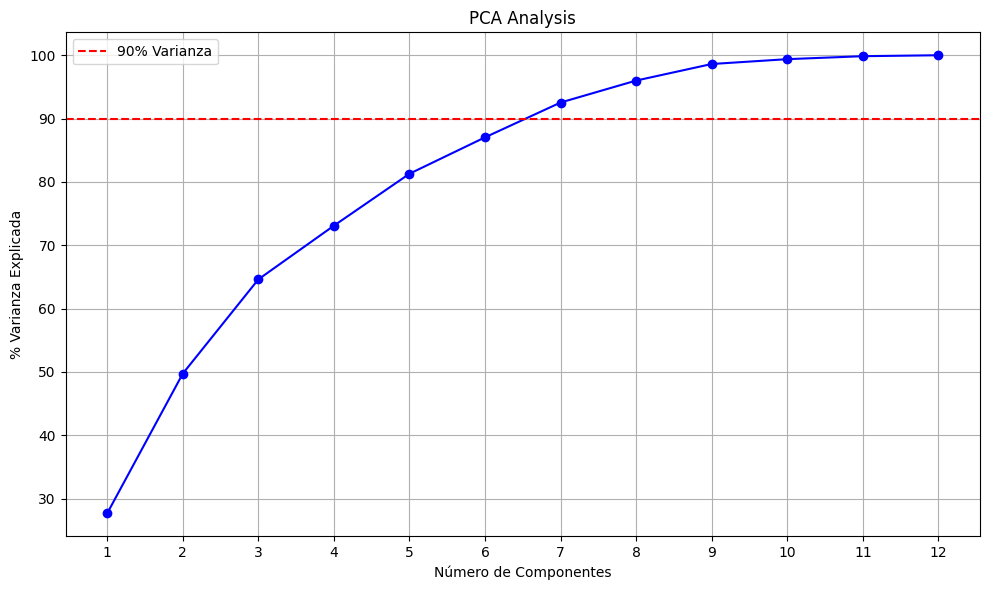

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', color='blue')
plt.axhline(y=90, color='r', linestyle='--', label='90% Varianza')
plt.title("PCA Analysis")
plt.xlabel("Número de Componentes")
plt.ylabel("% Varianza Explicada")
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [33]:
num_components = 3

pc_df = pd.DataFrame(abs(pca.components_[:num_components]),
                     columns=X.columns,
                     index=['Principal Component {}'.format(i) for i in range(1, num_components + 1)])


In [34]:
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal Component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal Component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal Component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695


In [35]:
top_variables = pc_df.iloc[0].nlargest(3)
print(top_variables)

potass    0.502603
fiber     0.458623
cups      0.371154
Name: Principal Component 1, dtype: float64


<ipython-input-36-ca0907a6b135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_variables.index, y=top_variables.values, palette='Set2')


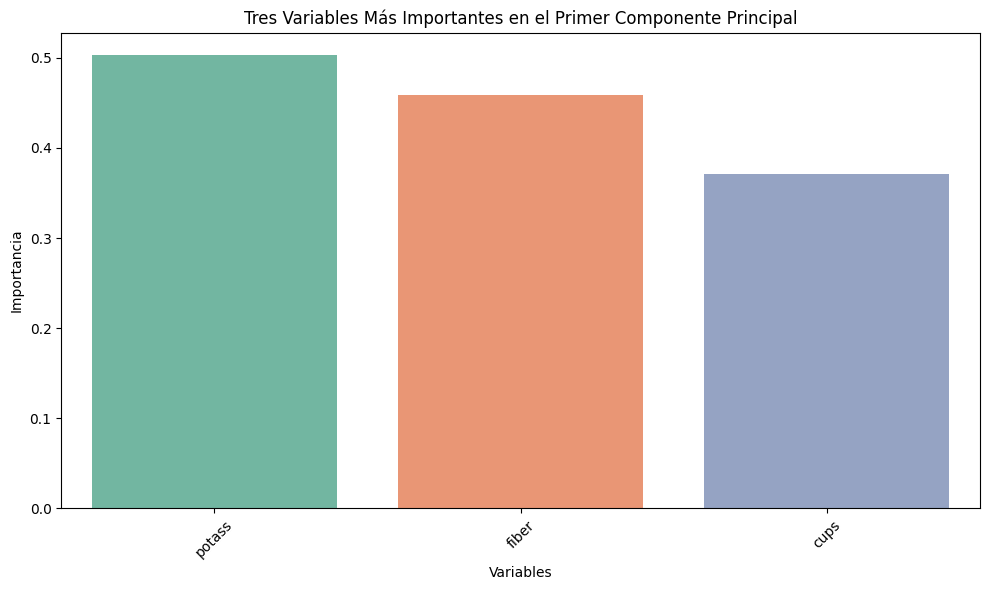

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_variables.index, y=top_variables.values, palette='Set2')
plt.title("Tres Variables Más Importantes en el Primer Componente Principal")
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [37]:
cat_columns.describe().T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Análisis:


1.   **One-hot Encoding**: Se utilizará este método tanto para la variable *mfr* como la *type*, esto debido a que son variables categóricas nominales, es decir, no tienen un orden entre sus valores.
2.   **Binary Encoding**: Se utilizará para la variable *name*, esto debido a que tiene un gran número de categorías, lo que podría resultar en un gran número de columnas si se aplica One-Hot Encoding.



In [38]:
from sklearn.preprocessing import OneHotEncoder
few_cardinal_variables = cereals_df[['mfr', 'type']]
highly_cardinal_variables = cereals_df[['name']]

encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(few_cardinal_variables)
onehot_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(few_cardinal_variables.columns))

In [39]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.5 MB/s eta 0:00:00


In [40]:
encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(highly_cardinal_variables)
binary_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [41]:
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

In [42]:
cereals_encoded_df = pd.concat([onehot_df, binary_df, cereals_df['rating']], axis=1)

In [43]:
cereals_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mfr_G   74 non-null     float64
 1   mfr_K   74 non-null     float64
 2   mfr_N   74 non-null     float64
 3   mfr_P   74 non-null     float64
 4   mfr_Q   74 non-null     float64
 5   mfr_R   74 non-null     float64
 6   type_H  74 non-null     float64
 7   name_0  74 non-null     int64  
 8   name_1  74 non-null     int64  
 9   name_2  74 non-null     int64  
 10  name_3  74 non-null     int64  
 11  name_4  74 non-null     int64  
 12  name_5  74 non-null     int64  
 13  name_6  74 non-null     int64  
 14  rating  74 non-null     float64
dtypes: float64(8), int64(7)
memory usage: 8.8 KB


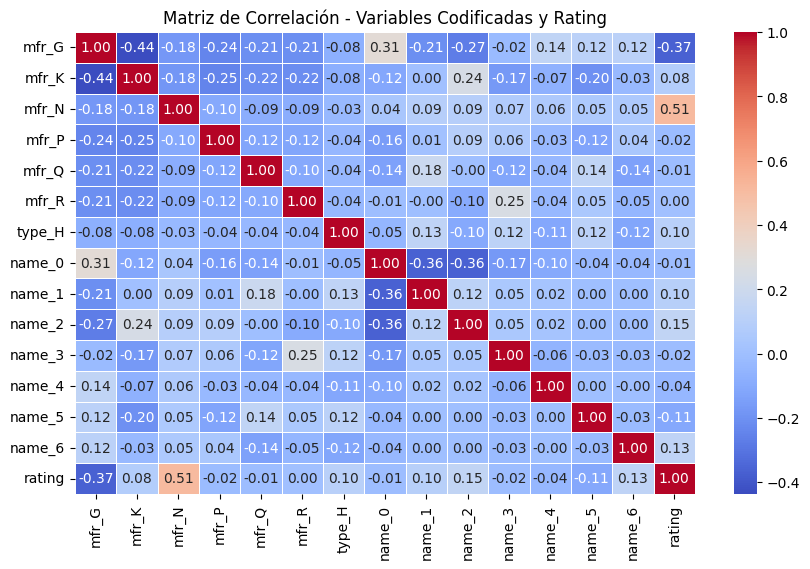

In [44]:
correlation_matrix = cereals_encoded_df.corr()

rating_corr = correlation_matrix['rating'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación - Variables Codificadas y Rating')
plt.show()

In [45]:
print("Correlaciones con 'rating':")
print(rating_corr)

Correlaciones con 'rating':
rating    1.000000
mfr_N     0.507609
name_2    0.146472
name_6    0.133936
type_H    0.104786
name_1    0.100804
mfr_K     0.080299
mfr_R     0.004494
name_0   -0.010482
mfr_Q    -0.013592
name_3   -0.015586
mfr_P    -0.017781
name_4   -0.039495
name_5   -0.109762
mfr_G    -0.367997
Name: rating, dtype: float64


En general, no hay relación entre las variables categóricas y la variable `rating`, a excepción de la categoría mfr_G y mfr_N, donde se tienen correlaciones altas.
* *mfr_G*: Hace referencia al cereal General Mills, y tiene una correlación negativa de -0.37, lo que indica que esta categoría tiende a dar un menor rating.
* *mfr_N*: Hace referencia al cereal Nabisco, y tiene una correlación de 0.51, lo que indica que esta categoría tiende a dar un mayor rating.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [46]:
num_components = np.argmax(cumulative_variance >= 0.90) + 1
pca_selected_df = x_projected.iloc[:, :num_components]
pca_selected_df.head(5)

,0,1,2,3,4,5,6
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652


In [47]:
final_df = pd.concat([pca_selected_df, cereals_encoded_df[['mfr_G', 'mfr_N']], y.reset_index(drop=True)], axis=1)

In [48]:
final_df.head(5)

,0,1,2,3,4,5,6,mfr_G,mfr_N,rating
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,0.0,1.0,68.402973
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.0,0.0,33.983679
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.0,0.0,59.425505
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.0,0.0,93.704912
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,1.0,0.0,29.509541


In [49]:
# Guardamos el dataframe resultante
#final_df.to_csv('cereals_analysis.csv', index=False)